In [89]:
#Importing neccesarry libraries
import pandas as pd
import numpy as np


# Data manipulation and analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [90]:
#load the dataset
df = pd.read_csv(r'/Users/wkhuz/Downloads/reddit_finance.csv/reddit_finance.csv')

In [91]:
# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,num_incomes,pan_inc_chg,pan_inc_chg_pct,pan_exp_chg,pan_exp_chg_pct,pan_fi_chg,pan_ret_date_chg,pan_financial_impact,political,...,2020_necessities_exp,2020_lux_exp,2020_child_exp,2020_debt_repay,2020_invst_save,2020_charity,2020_healthcare_exp,2020_taxes,2020_edu_exp,2020_other_exp
0,1,1,Stayed the same,No change,Decreased,11-20%,No change,No change,Neutral,NaN,...,18200.0,2400.0,NaN,19200.0,15000.0,40.0,70.0,23000.0,NaN,NaN
1,2,2,Stayed the same,No change,Decreased,1-10%,No change,No change,Positive,NaN,...,6000.0,2000.0,NaN,NaN,70000.0,NaN,NaN,NaN,NaN,NaN
2,3,1,Increased,1-10%,Decreased,1-10%,No change,No change,Neutral,NaN,...,16000.0,5000.0,NaN,8767.0,10000.0,NaN,450.0,36500.0,NaN,2500.0
3,4,1,Increased,41-50%,Decreased,11-20%,No change,Become sooner,Positive,NaN,...,5400.0,2400.0,NaN,NaN,50000.0,NaN,NaN,30000.0,NaN,NaN
4,5,1,Stayed the same,1-10%,Stayed the same,11-20%,No change,Become sooner,Neutral,NaN,...,10000.0,5000.0,NaN,NaN,150000.0,NaN,NaN,95000.0,NaN,NaN


In [92]:
# view columns
df.columns

Index(['Unnamed: 0', 'num_incomes', 'pan_inc_chg', 'pan_inc_chg_pct',
       'pan_exp_chg', 'pan_exp_chg_pct', 'pan_fi_chg', 'pan_ret_date_chg',
       'pan_financial_impact', 'political', 'race_eth', 'gender', 'age', 'edu',
       'rel_status', 'children', 'country', 'fin_indy', 'fin_indy_num',
       'fin_indy_pct', 'retire_invst_num', 'tgt_sf_wthdrw_rt',
       'max_retire_sup', 'retire_exp', 'whn_fin_indy_num', 'fin_indy_lvl',
       'retire_age', 'stp_whn_fin_indy', 'industry', 'employer', 'role',
       'ft_status', 'pt_status', 'gig_status', 'ne_status', 'edu_status',
       'housing', 'home_value', 'brokerage_accts_tax', 'retirement_accts_tax',
       'cash', 'invst_accts', 'spec_crypto', 'invst_prop_bus_own', 'other_val',
       'student_loans', 'mortgage', 'auto_loan', 'credit_personal_loan',
       'medical_debt', 'invst_prop_bus_own_debt', 'other_debt',
       '2020_gross_inc', '2020_housing_exp', '2020_utilities_exp',
       '2020_transp_exp', '2020_necessities_exp', '2020

In [93]:
# Handle missing values
df = df.dropna(subset=['medical_debt', 'age'])

# Function to convert age range to numeric average
def age_to_numeric(age):
    if '-' in age:
        return (int(age.split('-')[0]) + int(age.split('-')[1])) / 2
    return int(age)

# Convert the 'age' column
df['age'] = df['age'].apply(age_to_numeric)

In [94]:
# Create a binary target variable 
df['withdraw'] = np.where(df['medical_debt'] > 0, 1, 0)
# Select features
features = df[['medical_debt', 'age']]
target = df['withdraw']

withdraw
0    63
1    31
Name: count, dtype: int64


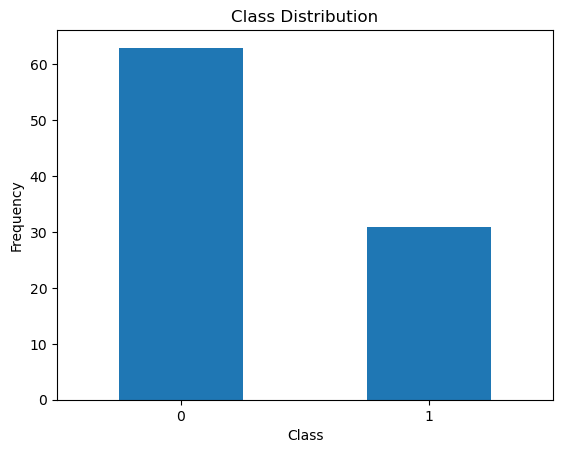

In [95]:
# Check distribution of the target variable
class_distribution = target.value_counts()
print(class_distribution)

# Visualize class distribution
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [101]:
# Create a SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled data
log_reg.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [102]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [103]:
# Train models and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

# Predicting on new data
new_data = pd.DataFrame({'medical_debt': [1000, 5000], 'age': [30, 45]})
predictions = models['Random Forest'].predict(new_data)
print(predictions)

Model: Logistic Regression
Confusion Matrix:
[[13  0]
 [ 0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



Model: Decision Tree
Confusion Matrix:
[[13  0]
 [ 0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



Model: Random Forest
Confusion Matrix:
[[13  0]
 [ 0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00     

In [110]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the distribution of classes in the training set
print(y_train.value_counts())

# Model Training
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Model Evaluation
y_pred_log_reg = log_reg.predict(X_test)

def evaluate_model(y_test, y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2f}')
    print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted"):.2f}')

print("Logistic Regression:")
evaluate_model(y_test, y_pred_log_reg)

tgt_sf_wthdrw_rt
1    1598
Name: count, dtype: int64


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# I plotted the graph to see if my classes were imbalances
# and introduced SMOTE to try and handle them but still the error occurred.